In [4]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) #tells the notebook to load figures in offline mode


import plotly
print(plotly.__version__)


import numpy as np
import astropy.units as u
from einsteinpy.plotting import ScatterGeodesicPlotter
from einsteinpy.metric import Schwarzschild
from einsteinpy.utils import schwarzschild_radius

import einsteinpy
print(einsteinpy.__version__)


import plotly.io as pio


3.8.1
0.2.dev0


<IPython.core.display.Javascript object>


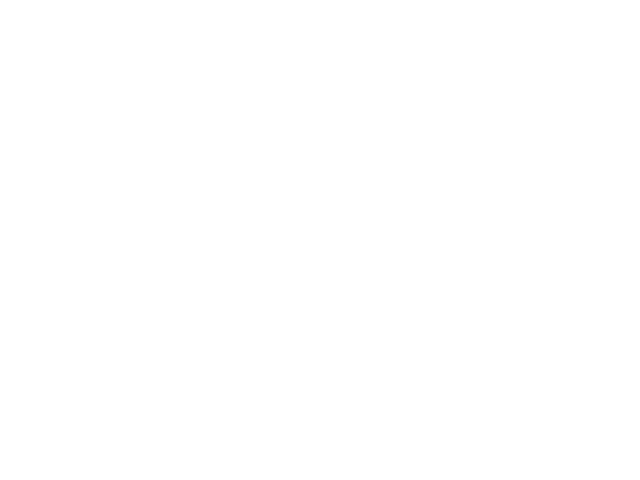

In [2]:
import numpy as np
import astropy.units as u
from einsteinpy.plotting import ScatterGeodesicPlotter
from einsteinpy.coordinates import SphericalDifferential

M = 6e24 * u.kg
sph_obj = SphericalDifferential(130*u.m, np.pi/2*u.rad, -np.pi/8*u.rad,
                                0*u.m/u.s, 0*u.rad/u.s, 1900*u.rad/u.s)

%matplotlib notebook
obj = ScatterGeodesicPlotter(M)
obj.animate(sph_obj, 0.002, 5e-8, interval=5)
obj.show() 

In [15]:
swc = Schwarzschild.from_spherical(sph_obj, M, 0 * u.s)

vals = swc.calculate_trajectory(
    end_lambda=0.002, OdeMethodKwargs={"stepsize":  5e-8}
)[1]

time = vals[:, 0]
r = vals[:, 1]
# Currently not being used (might be useful in future)
# theta = vals[:, 2]
phi = vals[:, 3]

pos_x = r * np.cos(phi)
pos_y = r * np.sin(phi)
frames = pos_x.shape[0]
x_max, x_min = max(pos_x), min(pos_x)
y_max, y_min = max(pos_y), min(pos_y)
margin_x = (x_max - x_min) * 0.1
margin_y = (y_max - y_min) * 0.1

In [ ]:
data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = pos_x[:i],
        y = pos_y[:i]) for i in range(0,len(pos_x),1000)]
data[5]['visible'] = True


steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout=dict(sliders=sliders,

            title='[EINSTEINPY] Plotly Animation', hovermode='closest',
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

# layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

iplot(fig, filename='[EINSTEINPY] Plotly Animation')

In [15]:
import time
import numpy as np
import astropy.units as u
from einsteinpy.plotting import ScatterGeodesicPlotter
from einsteinpy.coordinates import SphericalDifferential

M = 6e24 * u.kg
sph_obj = SphericalDifferential(130*u.m, np.pi/2*u.rad, -np.pi/8*u.rad,
                                0*u.m/u.s, 0*u.rad/u.s, 1900*u.rad/u.s)

<IPython.core.display.Javascript object>


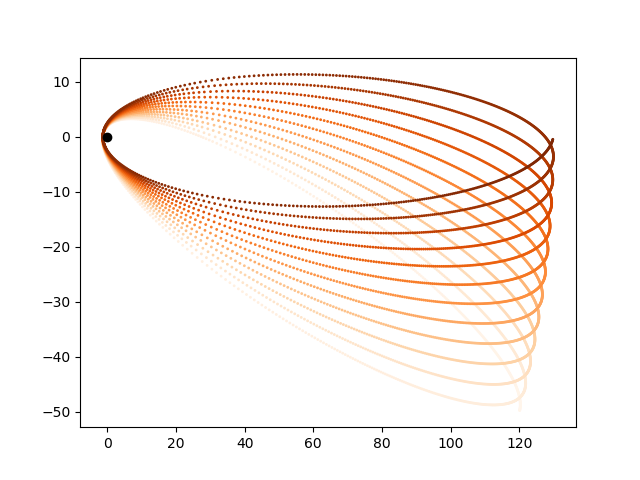

2.818711519241333


In [20]:
st = time.time()
# %matplotlib notebook
obj = ScatterGeodesicPlotter(M)
obj.plot(sph_obj, 0.002, 5e-8)
obj.show() 
fl = time.time()-st
print(fl)

In [17]:
print(fl)

2.765047550201416


In [21]:
st = time.time()
obj = InteractiveScatterGeodesicPlotter(M)
obj.plot(sph_obj, 0.002, 5e-8)
obj.show()
fl = time.time() - st
print(fl)

3.104757785797119


In [19]:
print(fl)

3.3028154373168945


In [114]:
import numpy as np

# data = [dict(
#         visible = False,
#         line=dict(color='#00CED1', width=6),
#         name = '𝜈 = '+str(step),
#         x = np.arange(0,10,0.01),
#         y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]

data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = pos_x[:i],
        y = pos_y[:i]) for i in range(0,len(pos_x),100)]
data[5]['visible'] = True

# iplot(data, filename='Single Sine Wave')

In [21]:
swc = Schwarzschild.from_spherical(sph_obj, M, 0 * u.s)

vals = swc.calculate_trajectory(
    end_lambda=0.002, OdeMethodKwargs={"stepsize":  5e-8}
)[1]

time = vals[:, 0]
r = vals[:, 1]
# Currently not being used (might be useful in future)
# theta = vals[:, 2]
phi = vals[:, 3]

pos_x = r * np.cos(phi)
pos_y = r * np.sin(phi)
frames = pos_x.shape[0]
x_max, x_min = max(pos_x), min(pos_x)
y_max, y_min = max(pos_y), min(pos_y)
margin_x = (x_max - x_min) * 0.1
margin_y = (y_max - y_min) * 0.1


In [37]:

data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = pos_x[:i],
        y = pos_y[:i]) for i in range(0,len(pos_x),100)]


steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True 
    steps.append(step)

sliders = [dict(
    active = 100,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout=dict(sliders=sliders,
            title='[EINSTEINPY] Plotly Animation', hovermode='closest',
            xaxis=dict(
                tickmode='linear',
                ticks='outside',
                tick0=int(x_min - margin_x),
                dtick=int((x_max + margin_x -x_min - margin_x))/10,
                ticklen=8,
                tickwidth=4,
                tickcolor='#000'
            ),
            yaxis=dict(
                tickmode='linear',
                ticks='outside',
                tick0=int(y_min - margin_y),
                dtick=int((y_max + margin_y -y_min - margin_y)/10),
                ticklen=8,
                tickwidth=4,
                tickcolor='#000'
            ),
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

# layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

plot(fig, filename='[EINSTEINPY] Plotly Animation')

'[EINSTEINPY] Plotly Animation.html'

In [34]:
int((y_max + margin_y -y_min - margin_y)/10)

6

In [23]:
import numpy as np

data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True


steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

iplot(fig, filename='Sine Wave Slider')

In [8]:
len(pos_x)

6463

In [1]:
'''
Imports for the Metrics/Helper functions
'''
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

from einsteinpy.metric import Schwarzschild

'''
Imports for Plotly
'''
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import  init_notebook_mode, plot, iplot
import plotly.io as pio  # To save the Plot as an Image


class InteractiveScatterGeodesicPlotter:
    """
    Class for plotting interactive plotly plots.
    """

    def __init__(
        self, mass, time=0 * u.s, attractor_color="black", cmap_color="Orange",connected=True
    ):
        """
        Parameters
        ----------
        attractor_color : string, optional
            Color which is used to denote the attractor. Defaults to black.
        cmap_color : string, optional
            Color used in function plot.
        """
        self.mass = mass
        self.time = time
        self.data = []
        self.trace = None
        self.fig = None
        #init_notebook_mode(connected=False)
        # self.steps = 
        self.connected = connected
        self._attractor_present = False
        self.attractor_color = attractor_color
        self.layout = dict(
            title = 'Interactive Plot',
            yaxis = dict(zeroline = False),
            xaxis = dict(zeroline = False)
             )
        self.cmap_color = cmap_color

    def _plot_attractor(self):

        self._attractor_present = True
        self.data.append(go.Scatter(
                                x = [0],
                                y = [0],
                                mode = 'markers',
                                name = 'attractor',
                                marker = dict(
                                    size = 5,
                                    color = self.attractor_color,
                                    line = dict(
                                        width = 2,
                                    )
                                )
                            ))

    def plot(self, coords, end_lambda=10, step_size=1e-3):
        """
        Parameters
        ----------
        coords : ~einsteinpy.coordinates.velocity.SphericalDifferential
            Position and velocity components of particle in Spherical Coordinates.
        end_lambda : float, optional
            Lambda where iteartions will stop.
        step_size : float, optional
            Step size for the ODE.
        """

        swc = Schwarzschild.from_spherical(coords, self.mass, self.time)

        vals = swc.calculate_trajectory(
            end_lambda=end_lambda, OdeMethodKwargs={"stepsize": step_size}
        )[1]

        time = vals[:, 0]
        r = vals[:, 1]
        # Currently not being used (might be useful in future)
        # theta = vals[:, 2]
        phi = vals[:, 3]

        pos_x = r * np.cos(phi)
        pos_y = r * np.sin(phi)

        self.data.append(
            go.Scatter(
                                x = pos_x,
                                y = pos_y,
                                mode = 'markers',
                                name = 'plot_points',
                                marker = dict(
                                    size = 5,
                                    color = self.cmap_color,   
                                    line = dict(
                                        width = 2,
                                    )
                                )
                            )
        )

        init_notebook_mode(connected=self.connected)


        self.fig = dict(data=self.data, layout=self.layout)
        # plt.scatter(pos_x, pos_y, s=1, c=time, cmap=self.cmap_color)

        if not self._attractor_present:
            self._plot_attractor()

    # TODO: WIP
    # SUGGESTION: Have another function to do the preprocessing and then update the State(self.) of the Object so that both animate() and plot()  have access to pos_x/pos_y etc.
    def animate(self, coords, end_lambda=10, step_size=1e-3, interval=50):
        """
        Function to generate animated plots of geodesics.
        Parameters
        ----------
        coords : ~einsteinpy.coordinates.velocity.SphericalDifferential
            Position and velocity components of particle in Spherical Coordinates.
        end_lambda : float, optional
            Lambda where iteartions will stop.
        step_size : float, optional
            Step size for the ODE.
        interval : int, optional
            Control the time between frames. Add time in milliseconds.
        """

        swc = Schwarzschild.from_spherical(coords, self.mass, self.time)

        vals = swc.calculate_trajectory(
            end_lambda=end_lambda, OdeMethodKwargs={"stepsize": step_size}
        )[1]

        time = vals[:, 0]
        r = vals[:, 1]
        # Currently not being used (might be useful in future)
        # theta = vals[:, 2]
        phi = vals[:, 3]

        pos_x = r * np.cos(phi)
        pos_y = r * np.sin(phi)
        x_max, x_min = max(pos_x), min(pos_x)
        y_max, y_min = max(pos_y), min(pos_y)
        margin_x = (x_max - x_min) * 0.1
        margin_y = (y_max - y_min) * 0.1


        self.data = [dict(
                            visible = False,
                            line=dict(color='#00CED1', width=6),
                            name = '',
                            x = pos_x[:i],
                            y = pos_y[:i]) for i in range(0,len(pos_x),100)]

        steps = []
        for i in range(len(self.data)):
            step = dict(
                method = 'restyle',  
                args = ['visible', [False] * len(self.data)],
            )
            step['args'][1][i] = True # Toggle i'th trace to "visible"
            steps.append(step)

        self.layout=dict(sliders=[dict
                                (
                                    active = 100,
                                    currentvalue = {"prefix": "Frequency: "},
                                    pad = {"t": 50},
                                    steps = steps
                                )],
                            title ='[EINSTEINPY] Plotly Animation', hovermode='closest',
                            xaxis =dict(
                                tickmode ='linear',
                                ticks ='outside',
                                tick0 = int(x_min - margin_x),
                                dtick = int((x_max + margin_x -x_min - margin_x))/10,
                                ticklen = 8,
                                tickwidth = 4,
                                tickcolor ='#000'
                            ),
                            yaxis=dict(
                                tickmode='linear',
                                ticks='outside',
                                tick0=int(y_min - margin_y),
                                dtick=int((y_max + margin_y -y_min - margin_y)/10),
                                ticklen=8,
                                tickwidth=4,
                                tickcolor='#000'
                            ),
                            updatemenus= [{'type': 'buttons',
                                        'buttons': [{'label': 'Play',
                                                        'method': 'animate',
                                                        'args': [None]}]}])
        self.fig= dict(data=self.data, layout=self.layout)                                                
        # def _update(frame):
        #     pic.set_offsets(np.vstack((pos_x[: frame + 1], pos_y[: frame + 1])).T)
        #     pic.set_array(time[: frame + 1])
        #     return (pic,)


    def show(self):
        iplot(self.fig, filename='InteractiveScatterGeodesicPlotter')


    def save(self, name="interactive_scatter_geodesic.jpeg"):
        return pio.to_image(self.fig, format='png')
#         pio.write_image(self.fig, name)


In [2]:
import numpy as np
import astropy.units as u
from einsteinpy.plotting import ScatterGeodesicPlotter
from einsteinpy.coordinates import SphericalDifferential

M = 6e24 * u.kg
sph_obj = SphericalDifferential(130*u.m, np.pi/2*u.rad, -np.pi/8*u.rad,
                                0*u.m/u.s, 0*u.rad/u.s, 1900*u.rad/u.s)

obj = InteractiveScatterGeodesicPlotter(M)
obj.plot(sph_obj, 0.002, 5e-8)
obj.show()

In [3]:
# plotly.io.orca.config.executable = r'C:\Users\ratin\AppData\Local\Programs\Microsoft VS Code\bin'


from IPython.display import Image
Image(obj.save())

ValueError: 
For some reason plotly.py was unable to communicate with the
local orca server process, even though the server process seems to be running.

Please review the process and connection information below:

orca status
-----------
    state: running
    executable: C:\Users\ratin\AppData\Local\Programs\Microsoft VS Code\bin\orca.EXE
    version: 1.2.1
    port: 53365
    pid: 7836
    command: ['C:\\Users\\ratin\\AppData\\Local\\Programs\\Microsoft VS Code\\bin\\orca.EXE', 'serve', '-p', '53365', '--plotly', 'C:\\Users\\ratin\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\plotly\\package_data\\plotly.min.js', '--graph-only', '--mathjax', 'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js']




In [5]:
" ".join(['C:\\Users\\ratin\\AppData\\Local\\Programs\\Microsoft VS Code\\bin\\orca.EXE', 'serve', '-p', '53365', '--plotly', 'C:\\Users\\ratin\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\plotly\\package_data\\plotly.min.js', '--graph-only', '--mathjax', 'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js'])

'C:\\Users\\ratin\\AppData\\Local\\Programs\\Microsoft VS Code\\bin\\orca.EXE serve -p 53365 --plotly C:\\Users\\ratin\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\plotly\\package_data\\plotly.min.js --graph-only --mathjax https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js'

In [ ]:
!orca serve -p 53365 --plotly C:\\Users\\ratin\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\plotly\\package_data\\plotly.min.js --graph-only --mathjax https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js